In [10]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [70]:
img_name = './visualizations/image_exs/14.jpg'
img = plt.imread(img_name)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [71]:
np.shape(img)

(666, 1368, 3)

In [72]:
rgb = img[:240, :320]
rgb = cv2.resize(rgb, (240,int(240*240/320)))
plt.imsave(img_name.replace('.jpg', '_rgb.jpg'), rgb)
depth = img[240:480, :320]
depth = cv2.resize(depth, (240,int(240*240/320)))
plt.imsave(img_name.replace('.jpg', '_depth.jpg'), depth)
pano_rgb = img[480:480+128, :512]
pano_rgb = cv2.resize(pano_rgb, (480,120))
plt.imsave(img_name.replace('.jpg', '_pano_rgb.jpg'), pano_rgb)
graph = img[:480, 320:-241]
plt.imsave(img_name.replace('.jpg', '_graph.jpg'), graph)



In [58]:
rgb = cv2.resize(rgb, (240,int(240*240/320)))

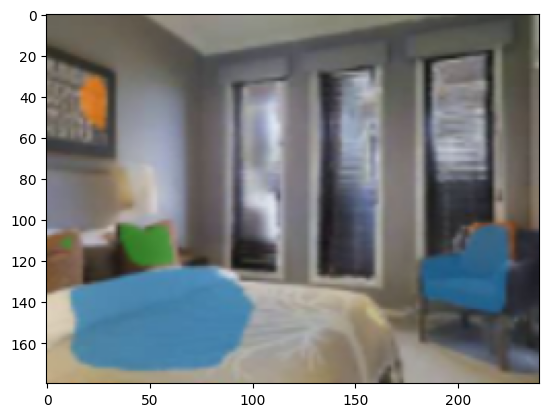

In [59]:
plt.imshow(rgb)

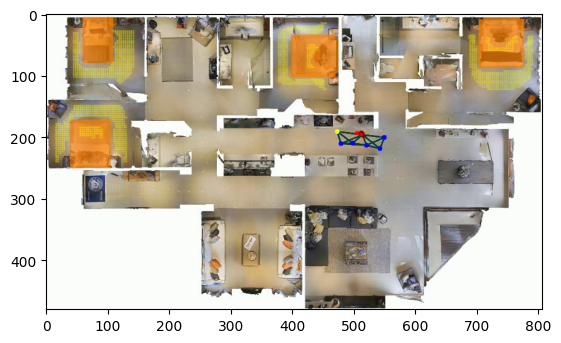

In [38]:
graph = img[:480, 320:-241]

In [98]:
def make_cropped_frame(image):
    new_image = np.zeros([608, 640, 3]).astype(np.uint8)
#     print(np.shape(new_image))
#     print(np.shape(image))
    new_image[:240, :] = image[:240, :]
    new_image[240:, :] = image[400:, :]
    return new_image

In [99]:
def resize_video_to_custom_dimensions(input_path, output_path, new_width, new_height):
    # Open the video
    cap = cv2.VideoCapture(input_path)

    # Check if video opened successfully
    if not cap.isOpened():
        print("Error: Couldn't open the video file.")
        return

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')  # For MP4 videos
    out = cv2.VideoWriter(output_path, fourcc, 5.0, (new_width, new_height))

    while True:
        ret, frame = cap.read()
        
        # If frame is read correctly, ret is True
        if not ret:
            break
        frame = make_cropped_frame(frame)
        # Resize the frame to custom dimensions
#         resized_frame = cv2.resize(frame, (new_width, new_height))

        # Write the frame to the output video
        out.write(frame)

    # Release the video objects
    cap.release()
    out.release()

In [100]:
input_path = './visualizations/image_exs/example.mp4'
output_path = './visualizations/image_exs/example2.mp4'
resize_video_to_custom_dimensions(input_path, output_path, 160, 160)  # Resizes video to 640x480

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
